In [48]:
#importing the libraries

import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.callbacks import Callback

In [49]:
#import the Fashion MNIST data set from the tensorflow.keras.datasets

from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [50]:
#to see the training data shape
X_train.shape

(60000, 28, 28)

In [51]:
#to see the testing data shape
X_test.shape

(10000, 28, 28)

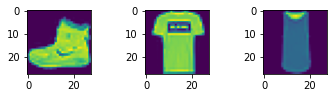

In [52]:
#plot the few images

for i in range(3):
    #define the subplot
    plt.subplot(330+1+i)
    
    #plot the raw pixel data
    plt.imshow(X_train[i])




In [53]:
#Normalizing the data as grayscale image values between 0 to 255 as computer understand the value between 0  to 1

X_train=X_train/255
X_test=X_test/255

In [54]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [55]:
y_train[0]

9

In [56]:
class_names=['Top','Trouser','Pullover','Dress','Coat','Sandol','Shirt','Sneaker','Bag','Ankle Boot']

In [58]:
model=Sequential()

In [60]:
model.add(Flatten(input_shape=[28,28]))

In [61]:
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [65]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])            
             

In [66]:
model.fit(X_train,y_train,epochs=10,verbose=1)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 57s 956us/sample - loss: 0.1746 - accuracy: 0.9355
Epoch 2/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.1680 - accuracy: 0.9363
Epoch 3/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.1659 - accuracy: 0.9375
Epoch 4/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.1620 - accuracy: 0.9393
Epoch 5/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.1565 - accuracy: 0.9411
Epoch 6/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.1542 - accuracy: 0.9414
Epoch 7/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.1500 - accuracy: 0.9428
Epoch 8/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.1462 - accuracy: 0.9455
Epoch 9/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.1421 - accuracy: 0.9466
Epoch 10/10


In [95]:
#callbacks implementation

#Define the call back class
class mycallback_class(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('loss')<0.08):
            print("model loss is greater than 0.15 , hence stopping the training", logs.get('accuracy'))
            print(logs)
            self.model.stop_training = True

#callbacks = myCallback()
callbacks = mycallback_class()       



In [96]:
#Model training
model.fit(X_train,y_train,epochs=10,callbacks=[callbacks])

Train on 60000 samples
Epoch 1/10
59584/60000 [============================>.] - ETA: 0s - loss: 0.0600 - accuracy: 0.9779model loss is greater than 0.15 , hence stopping the training 0.97791666
{'loss': 0.05998895935607143, 'accuracy': 0.97791666}
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0600 - accuracy: 0.9779
